In [1]:
import random
import numpy as np

迷宮遊戲：共有五個位置，一開始站在中間，每移動一步扣0.02分，走到左端得-1分，右端得1分，走到左右端即結束。

In [2]:
#建立環境
class Environment:

    def __init__(self): #初始位置在3
        self.position = 3

    def get_observation(self): #回傳狀態，位置有1~5
        return [i for i in range(1,6)]
    
    def get_actions(self): #-1代表往左、1代表往右
        return [-1,1]
    
    def is_done(self): #判斷比賽是否結束
        return self.position == 1 or self.position == 5
    
    def step(self,action): #根據行動計算reward
        if self.is_done(): 
            raise Exception('Game Over')
        self.position += action
        if self.position == 1:
            reward = -1
        elif self.position == 5:
            reward =1
        else:
            reward = -0.02

        return self.position, reward

In [3]:
#建立代理人
class Actor:

    def __init__(self):
        pass
    
    def action(self,env): #隨機向左或向右
        current_obs = env.get_observation()
        return random.choice(env.get_actions())

In [5]:
if __name__ == "__main__":
    env = Environment()
    actor = Actor()
    total_reward = 0
    while not env.is_done():
        action = actor.action(env)
        state, reward = env.step(action)
        total_reward += reward
    print(f"累積reward:{total_reward:.2f}")

累積reward:0.94


In [6]:
env = Environment()
actor = Actor()
for _ in range(10):
    env.__init__()
    total_reward = 0
    while not env.is_done():
        action = actor.action(env)
        state, reward = env.step(action)
        total_reward += reward
    print(f"累積reward:{total_reward:.2f}")

累積reward:-1.02
累積reward:0.94
累積reward:0.94
累積reward:0.98
累積reward:0.94
累積reward:0.94
累積reward:0.86
累積reward:-1.10
累積reward:0.94
累積reward:-1.02


In [14]:
node_count = 15
normal_reward = -0.02

In [47]:
#建立環境
class Environment:

    def __init__(self): #初始位置在中心
        self.state_value = np.full((node_count+1), 0.0)
        self.state_value_count = np.full((node_count+1), 0)

    def reset(self):
        self.poistion = int((node_count+1) / 2)
        self.trajectory = [self.poistion]

    def get_states(self): #回傳狀態，位置有1~5
        return [i for i in range(1,node_count+1)]
    
    def get_actions(self): #-1代表往左、1代表往右
        return [-1,1]
    
    def is_done(self): #判斷比賽是否結束
        if self.poistion == 1 or self.poistion == node_count:
            return True
        else:
            return False
    
    def step(self,action): #根據行動計算reward
        if self.is_done(): 
            raise Exception('Game Over')
        
        self.poistion += action
        self.trajectory.append(self.poistion)
        if self.poistion == 1:
            reward = -1
        elif self.poistion == node_count:
            reward = 1
        else:
            reward = normal_reward

        return self.poistion, reward
    
    def update_state_value(self,final_value):
        for i in range(len(self.trajectory)-1, -1, -1):
            final_value += normal_reward
            self.state_value[self.trajectory[i]] += final_value
            self.state_value_count[self.trajectory[i]] += 1

    def get_observation(self):
        mean1 = np.full((node_count+1), 0.0)
        for i in range(1,node_count+1):
            if self.state_value_count[i] == 0:
                mean1[i] = 0
            else:
                mean1[i] = self.state_value[i] / self.state_value_count[i]
        return mean1

In [33]:
class Actor:

    def __init__(self):
        pass
    
    def action(self, env):
        state_value = env.get_observation()
        
        if state_value[env.poistion-1] > state_value[env.poistion+1]:
            next_action = -1
        if state_value[env.poistion-1] < state_value[env.poistion+1]:
            next_action = 1
        else:
            next_action = random.choice(env.get_actions())

        if len(env.trajectory) >= 3 and env.poistion + next_action == env.trajectory[-2] and env.trajectory[-1] == env.trajectory[-3]:
            next_action = -next_action
        return next_action

In [45]:
env = Environment()
actor = Actor()

total_reward_list = []
for i in range(10):
    env.reset()
    total_reward = 0
    action_count = 0
    while not env.is_done():
        action = actor.action(env)
        action_count += 1
        state, reward = env.step(action)
        # print(state, reward)
        total_reward += reward

        if action_count > 100:
            env.poistion = int((node_count + 1)/2)
            break
    print(f'trajectory {i}: {env.trajectory}')
    if action_count <= 100:
        env.update_state_value(total_reward)
        # print(f'state value: {list(np.around(env.get_observation()[1:] ,2))}')
    total_reward_list.append(round(total_reward, 2))

print(f'累積reward: {total_reward_list}')

trajectory 0: [8, 7, 6, 5, 4, 3, 4, 5, 6, 7, 6, 5, 6, 7, 8, 7, 6, 5, 4, 3, 4, 5, 4, 3, 4, 5, 6, 5, 4, 3, 4, 5, 4, 3, 2, 3, 4, 5, 4, 3, 2, 1]
trajectory 1: [8, 9, 10, 11, 12, 13, 14, 13, 12, 11, 12, 13, 14, 15]
trajectory 2: [8, 9, 10, 11, 12, 13, 14, 15]
trajectory 3: [8, 9, 10, 11, 12, 13, 14, 15]
trajectory 4: [8, 9, 10, 11, 12, 13, 14, 15]
trajectory 5: [8, 9, 10, 11, 12, 13, 14, 15]
trajectory 6: [8, 9, 10, 11, 12, 13, 14, 15]
trajectory 7: [8, 9, 10, 11, 12, 13, 14, 15]
trajectory 8: [8, 9, 10, 11, 12, 13, 14, 15]
trajectory 9: [8, 9, 10, 11, 12, 13, 14, 15]
累積reward: [-1.8, 0.76, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88]


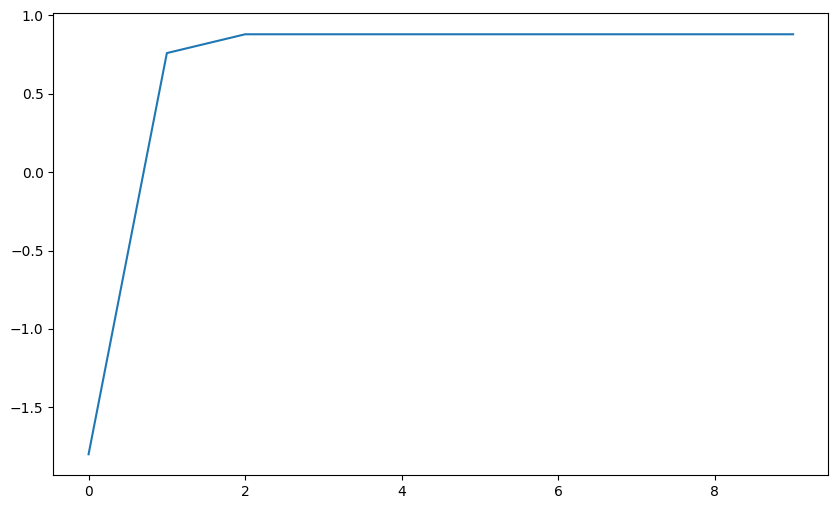

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(total_reward_list)